In [1]:
import pandas as pd
import geopandas as gpd
import geodatasets
import rasterio
from rasterio.plot import show
import contextily as cx
from matplotlib import pyplot as plt


In [ ]:
# Load data and set filepaths
als_metrics = r'D:/Sync/TA_Work/gaa_2025/Data-Analytics-Tutorials/data/als_metrics.tif'

plot_locs_fpath = r'D:/Sync/TA_Work/gaa_2025/Data-Analytics-Tutorials/data/original/SPL2018_EFI_ground_plots/PRF_SPL2018_EFI_plots_pts_wgs84.shp'
plots_xy = gpd.read_file(plot_locs_fpath)

prf_boundary_fpath = r'D:/Sync/TA_Work/gaa_2025/Data-Analytics-Tutorials/data/original/prf_boundary/prf_boundary.shp'
prf_boundary = gpd.read_file(prf_boundary_fpath)


In [3]:

sp_codes = r'D:/Sync/TA_Work/gaa_2025/Data-Analytics-Tutorials/data/original/sp_codes.csv'
sp_codes_df = pd.read_csv(sp_codes).rename(columns={'Name': 'species'})

plots_fpath = r'D:/Sync/TA_Work/gaa_2025/Data-Analytics-Tutorials/data/original/SPL2018_EFI_ground_plots/PRF_CNL_SPL_CalibrationData_LiveDeadStems.xlsx'
plots_df = (pd.read_excel(plots_fpath, sheet_name='Plotsum')
            .rename(columns={'Leadsp': 'MNR Code'})
            .merge(sp_codes_df, how='left', on='MNR Code'))


plots_df

,PlotName,Status,BA_all,TPH_all,DCD_Count,PlantProp,origin,tvol,mvol,ba_merch,...,HL_all,HL_merch,FU,MurrayFU,dbhmax,dbh95,dbhq_all,dbhq_merch,species,MNR Species
0,PRF001,D,0.251353,32,NaN,1.00000,P,1.381989,0.000000,0.251353,...,11.488825,11.488825,NaN,Dead,10.1,10.1,10.000500,10.000500,White pine,PW
1,PRF001,L,33.601655,2688,4.0,0.22592,N,323.132202,241.738524,29.076337,...,22.944812,24.935425,PWus,PwPr,67.5,51.5,12.615959,18.446329,White pine,PW
2,PRF002,L,44.127504,15392,7.0,0.00000,N,353.671565,298.646059,25.101346,...,19.961161,30.817948,PWus,PwPr,60.2,51.2,6.041735,40.799275,White pine,PW
3,PRF003,D,3.615982,96,NaN,0.00000,N,28.793416,26.305051,3.615982,...,20.624830,20.624830,NaN,Dead,39.2,39.2,21.899391,21.899391,White spruce,SW
4,PRF003,L,28.489549,784,20.0,0.00000,N,253.695027,223.463661,28.489549,...,19.994438,19.994438,MXHcc,MIXEDH,44.6,36.0,21.509945,21.509945,Trembling Aspen,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,PRF328,L,27.737274,4088,38.0,0.00000,N,189.940731,82.618709,21.041896,...,15.960313,17.609979,PWus,MIXEDH,52.3,21.5,9.294606,15.692153,Sugar Maple,MH
371,PRF330,L,11.977325,96,4.0,0.00000,N,162.255269,154.522811,11.977325,...,32.296349,32.296349,PWus,PwPr,54.6,54.6,39.856472,39.856472,Red pine,PR
372,PRF331,L,17.746276,512,6.0,0.00000,N,243.568247,231.279887,16.748347,...,31.173273,32.522499,PRcc,PwPr,56.1,56.1,21.007443,43.634652,Red pine,PR
373,PRF332,L,19.887754,376,6.0,0.00000,N,256.948614,241.426876,19.540765,...,31.282475,31.699749,PWus,PwPr,61.4,61.4,25.950964,37.598368,White pine,PW


('avg_95', 'avg', 'b10', 'b20', 'b30', 'b40', 'b50', 'b60', 'b70', 'b80', 'b90', 'dns_10m', 'dns_12m', 'dns_14m', 'dns_15m', 'dns_16m', 'dns_18m', 'dns_20m', 'dns_25m', 'dns_2m', 'dns_4m', 'dns_5m', 'dns_6m', 'dns_8m', 'kur_95', 'p01', 'p05', 'p10', 'p20', 'p30', 'p40', 'p50', 'p60', 'p70', 'p80', 'p90', 'p95', 'p99', 'qav', 'skew_95', 'd0_2', 'd10_12', 'd12_14', 'd14_16', 'd16_18', 'd18_20', 'd20_22', 'd22_24', 'd24_26', 'd26_28', 'd28_30', 'd2_4', 'd30_32', 'd32_34', 'd34_36', 'd36_38', 'd38_40', 'd40_42', 'd42_44', 'd44_46', 'd46_48', 'd4_6', 'd6_8', 'd8_10', 'std_95', 'vci_1mbin', 'vci_0.5bin')


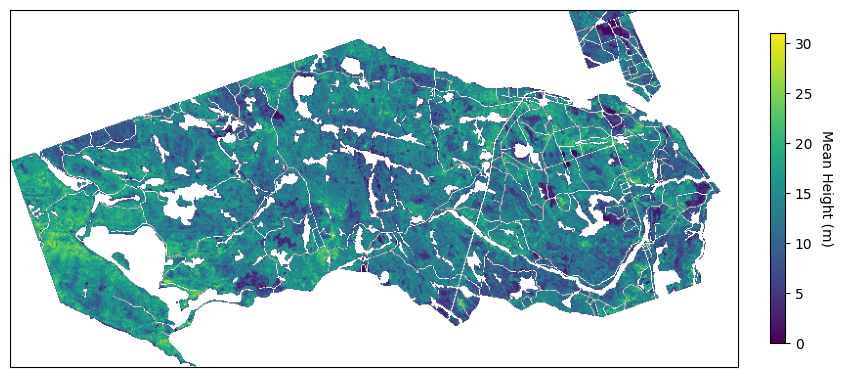

In [ ]:
with rasterio.open(als_metrics) as src:
    band_names = src.descriptions

    prf_crs = src.crs

    print(band_names)

    mn_z = src.read(2)

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(mn_z, cmap='viridis')

ax.set_xticks([])
ax.set_yticks([])

cbar = plt.colorbar(ax.images[0], ax=ax, fraction=0.02, pad=0.04)
cbar.set_label('Mean Height (m)', rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=10)

[]

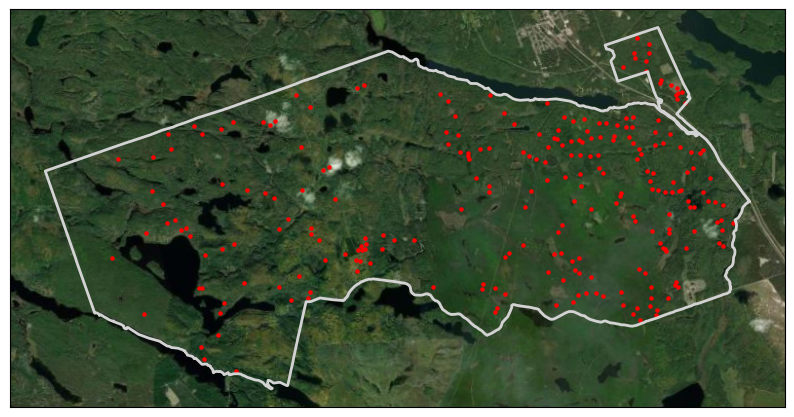

In [5]:
ax = plots_xy.plot(figsize=(10, 10), color='red', markersize=5)

prf_boundary.plot(ax=ax, facecolor='none', edgecolor='lightgrey', linewidth=2)

cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery,
               attribution="", crs=plots_xy.crs)

ax.set_xticks([])
ax.set_yticks([])